# 什么是逻辑回归
逻辑回归被用来处理不同的分类问题，这里的目的是预测当前被观察的对象属于哪个组。它会给你提供一个离散的二进制输出结果。

一个简单的例子就是判断一个人是否会在即将到来的选举中进行投票。

# 如何工作
逻辑回归使用基础逻辑函数通过估算概率来测量因变量（我们想要预测的标签）和一个或者多个自变量之间的关系。

# 做出预测
这些概率值必须转换为二进制数，以便实际中进行预测。这是逻辑函数的任务，也被称为sigmoid函数。然后使用阈值分类器将（0，1）范围的值转化成0和1的值来表示结果。

# 逻辑回归 VS 线性回归
逻辑回归给出离散的输出结果，然后线性回归给出的是连续的输出结果。

---

# 一、数据预处理
## 导入库

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 导入数据集

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:,4].values

## 将数据集分成训练集和测试集

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

## 特征缩放

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 二、逻辑回归模型
## 将逻辑回归应用于训练集

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

# 三、预测
## 预测测试集结果

In [7]:
y_pred = classifier.predict(X_test)

# 四、评估预测
## 生成混淆矩阵

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

## 可视化

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


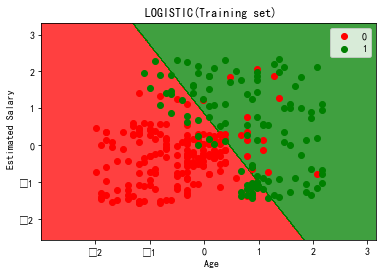

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


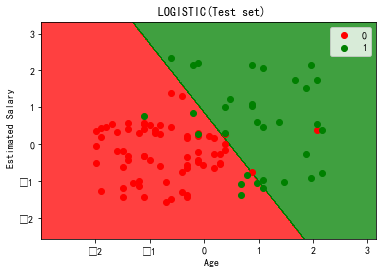

In [9]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Training set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()

X_set,y_set = X_test,y_test
X1,X2 = np. meshgrid(np. arange(start=X_set[:,0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
                   np. arange(start=X_set[:,1].min()-1, stop=X_set[:,1].max()+1, step=0.01))

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np. unique(y_set)):
    plt.scatter(X_set[y_set==j,0],X_set[y_set==j,1],
                c = ListedColormap(('red', 'green'))(i), label=j)

plt. title(' LOGISTIC(Test set)')
plt. xlabel(' Age')
plt. ylabel(' Estimated Salary')
plt. legend()
plt. show()